In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer
import time

# 'NGPR81FL.DTA'

In [ ]:
#ds = ['NGFW81FL.DTA','NGHR81FL.DTA','NGIR81FL.DTA','NGKR81FL.DTA','NGPR81FL.DTA']
#df = pd.read_stata(ds[4],convert_categoricals=False)
#df = pd.read_stata('NGPR81FL.DTA',convert_categoricals=False)
#df.to_csv('DataMalaria.csv')
#df.head()

In [ ]:
#df = pd.read_csv('NGPR81FL.csv',low_memory=False)
df = pd.read_csv('/content/drive/MyDrive/DataScience/DataMalaria.csv',low_memory=False)
dfraw = df.copy()
dfraw.head()

,Unnamed: 0,hhid,hvidx,hv000,hv001,hv002,hv003,hv004,hv005,hv006,...,hml37g,hml37h,hml37i,hml37j,hml37k,hml37l,hml37m,hml38,hml39,hml40
0,0,1 1,1,NG8,1,1,3,1,1119345,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1 1,2,NG8,1,1,3,1,1119345,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1 1,3,NG8,1,1,3,1,1119345,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1 1,4,NG8,1,1,3,1,1119345,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1 1,5,NG8,1,1,3,1,1119345,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
features = pd.read_csv('/content/drive/MyDrive/DataScience/features.csv')
for i in range(len(features)):
    if features.iloc[i,3] == "categorical":
        features.iloc[i,3]  = "category"
    elif features.iloc[i,3] == "int":
        features.iloc[i,3]  = "int64"
    else:
        features.iloc[i,3]  = "float64"

In [ ]:
features

,var,Var,Description,DataType,Values
0,hv009,HV009,Number of household members,int64,0 to 90
1,hv024,HV024,SubRegion,category,"Sokoto, Zamfara, Katsina, Jigawa, Yobe, Borno,..."
2,hv025,HV025,Type of place of residence,category,Urban & Rural
3,hv045c,HV045C,Native language of respondent,category,"English, Hausa, Yoruba, Igbo, Fulfulde, Other"
4,hv201,HV201,Source of drinking water,category,"PIPED WATER, Piped into dwelling, Piped to yar..."
5,hv202,HV202,Source of non-drinking water,category,"PIPED WATER, Piped into dwelling, Piped to yar..."
6,hv204,HV204,Time to get to water source (minutes),int64,"0 to 900, 996 (On premises), 998 (Don't know)"
7,hv205,HV205,Type of toilet facility,category,"FLUSH TOILET, Flush to piped sewer system, Flu..."
8,hv225,HV225,Share toilet with other households,category,No & Yes
9,hv227,HV227,Has mosquito bed net for sleeping,category,No & Yes


In [ ]:
# hml32 = Final result of malaria from blood smear test[0-Negative,1-Positive], 
# hml35 = Result of malaria rapid test [0-Negative,1-Positive]

In [ ]:
dfn = dfraw[features["var"]].copy()
dfn.head()

,hv009,hv024,hv025,hv045c,hv201,hv202,hv204,hv205,hv225,hv227,...,hml35,hml37a,hml37b,hml37f,hml37g,hml37h,hml37i,hml37j,hml37k,hml37l
0,14,18,1,6,31,NaN,2,12,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14,18,1,6,31,NaN,2,12,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14,18,1,6,31,NaN,2,12,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14,18,1,6,31,NaN,2,12,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14,18,1,6,31,NaN,2,12,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# hc1a = Child's age in days

In [ ]:
dfn['hc1a'] = dfraw['hc1a'] # assigning the child column to dataset

In [ ]:
# hml32 = Final result of malaria from blood smear test[0-Negative,1-Positive],

In [ ]:
dfNe = dfn[(dfn['hml32'] == 0) | (dfn['hml32'] == 1)].copy()
dfNe = dfNe.reset_index()
del dfNe['index']
me = dfNe.copy()
dfNe.head()

,hv009,hv024,hv025,hv045c,hv201,hv202,hv204,hv205,hv225,hv227,...,hml35,hml37a,hml37b,hml37f,hml37g,hml37h,hml37i,hml37j,hml37k,hml37l
0,14,18,1,6,31,NaN,2,12,0.0,0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14,18,1,6,31,NaN,2,12,0.0,0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14,18,1,6,31,NaN,2,12,0.0,0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,18,1,6,31,NaN,996,12,1.0,1,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,18,1,6,31,NaN,996,12,0.0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dfNe.shape

(10655, 43)

In [ ]:
#dfNe = dfNe.astype("category")

In [ ]:
dfNe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655 entries, 0 to 10654
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   hv009     10655 non-null  int64  
 1   hv024     10655 non-null  int64  
 2   hv025     10655 non-null  int64  
 3   hv045c    10655 non-null  int64  
 4   hv201     10655 non-null  int64  
 5   hv202     755 non-null    float64
 6   hv204     10655 non-null  int64  
 7   hv205     10655 non-null  int64  
 8   hv225     8000 non-null   float64
 9   hv227     10655 non-null  int64  
 10  hv228     10630 non-null  float64
 11  hv235     9712 non-null   float64
 12  hv238a    8000 non-null   float64
 13  hv244     10655 non-null  int64  
 14  hv246     10655 non-null  int64  
 15  hv246g    10655 non-null  int64  
 16  hv270     10655 non-null  int64  
 17  shregion  10655 non-null  int64  
 18  hc1a      10655 non-null  float64
 19  hc27      10655 non-null  float64
 20  hc53      10655 non-null  fl

In [ ]:
features['counts']=0
for i in range(len(dfNe.columns)):
    features.iloc[i,-1] = (dfNe.iloc[:,i].value_counts()).sum()
features

,var,Var,Description,DataType,Values,counts
0,hv009,HV009,Number of household members,int64,0 to 90,10655
1,hv024,HV024,SubRegion,category,"Sokoto, Zamfara, Katsina, Jigawa, Yobe, Borno,...",10655
2,hv025,HV025,Type of place of residence,category,Urban & Rural,10655
3,hv045c,HV045C,Native language of respondent,category,"English, Hausa, Yoruba, Igbo, Fulfulde, Other",10655
4,hv201,HV201,Source of drinking water,category,"PIPED WATER, Piped into dwelling, Piped to yar...",10655
5,hv202,HV202,Source of non-drinking water,category,"PIPED WATER, Piped into dwelling, Piped to yar...",755
6,hv204,HV204,Time to get to water source (minutes),int64,"0 to 900, 996 (On premises), 998 (Don't know)",10655
7,hv205,HV205,Type of toilet facility,category,"FLUSH TOILET, Flush to piped sewer system, Flu...",10655
8,hv225,HV225,Share toilet with other households,category,No & Yes,8000
9,hv227,HV227,Has mosquito bed net for sleeping,category,No & Yes,10655


In [ ]:
dfNe = dfNe.drop(columns = ['sh130']) # dropping due to no data
dfNe = dfNe.drop(columns = ['hv202']) # Source of non-drinking water
dfNe = dfNe.drop(columns = ['hml23']) # Place where net was obtained

In [ ]:
dff = dfNe.copy()

# Reserving data for KNN Imputation

In [ ]:
DataFarmeKNNImputation = dfNe.copy()

In [ ]:
DataFarmeKNNImputation.head()

,hv009,hv024,hv025,hv045c,hv201,hv204,hv205,hv225,hv227,hv228,...,hml35,hml37a,hml37b,hml37f,hml37g,hml37h,hml37i,hml37j,hml37k,hml37l
0,14,18,1,6,31,2,12,0.0,0,3.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14,18,1,6,31,2,12,0.0,0,3.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14,18,1,6,31,2,12,0.0,0,3.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,18,1,6,31,996,12,1.0,1,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,18,1,6,31,996,12,0.0,1,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
DataFarmeKNNImputation.shape

(10655, 40)

# Filtering start

In [ ]:
flist = []
count = []
for i in range(len(dff.columns)):
    flist.append(dff.columns[i])
    count.append((dff.iloc[:,i].value_counts()).sum())
nf = pd.DataFrame({
    'Features':flist,
    'count' : count
})
nf

,Features,count
0,hv009,10655
1,hv024,10655
2,hv025,10655
3,hv045c,10655
4,hv201,10655
5,hv204,10655
6,hv205,10655
7,hv225,8000
8,hv227,10655
9,hv228,10630


In [ ]:
nf['count'].min()

4079

In [ ]:
dff['hv225'].value_counts()

0.0    5620
1.0    2380
Name: hv225, dtype: int64

In [ ]:
#1
c = dff[(dff['hml37l'] == 0) | (dff['hml37l'] == 1)]

In [ ]:
flist = []
count = []
for i in range(len(c.columns)):
    flist.append(c.columns[i])
    count.append((c.iloc[:,i].value_counts()).sum())
nf = pd.DataFrame({
    'Features':flist,
    'count' : count
})
nf

,Features,count
0,hv009,4079
1,hv024,4079
2,hv025,4079
3,hv045c,4079
4,hv201,4079
5,hv204,4079
6,hv205,4079
7,hv225,2858
8,hv227,4079
9,hv228,4073


In [ ]:
nf['count'].min()

1739

In [ ]:
c['hml22'].value_counts()

1.0    1224
0.0     303
2.0     131
3.0      81
Name: hml22, dtype: int64

In [ ]:
#2
c = c[(c['hml22'] == 0) | (c['hml22'] == 1) | (c['hml22'] == 2) | 
       (c['hml22'] == 3)]

In [ ]:
c 

,hv009,hv024,hv025,hv045c,hv201,hv204,hv205,hv225,hv227,hv228,...,hml35,hml37a,hml37b,hml37f,hml37g,hml37h,hml37i,hml37j,hml37k,hml37l
7,6,18,1,6,31,996,22,0.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,6,18,1,6,31,996,13,1.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,6,18,1,6,31,996,13,1.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,6,18,1,6,21,6,12,0.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,10,18,1,6,21,2,12,0.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10647,7,21,2,3,21,15,31,NaN,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10651,4,21,2,6,31,5,31,NaN,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10652,5,21,2,6,31,5,31,NaN,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10653,5,21,2,6,31,5,31,NaN,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
flist = []
count = []
for i in range(len(c.columns)):
    flist.append(c.columns[i])
    count.append((c.iloc[:,i].value_counts()).sum())
nf = pd.DataFrame({
    'Features':flist,
    'count' : count
})
nf

,Features,count
0,hv009,1739
1,hv024,1739
2,hv025,1739
3,hv045c,1739
4,hv201,1739
5,hv204,1739
6,hv205,1739
7,hv225,1259
8,hv227,1739
9,hv228,1736


In [ ]:
nf['count'].min()

1259

In [ ]:
c['hv225'].value_counts()

0.0    975
1.0    284
Name: hv225, dtype: int64

In [ ]:
#3
c = c[(c['hv225'] == 0) | (c['hv225'] == 1)]

In [ ]:
c

,hv009,hv024,hv025,hv045c,hv201,hv204,hv205,hv225,hv227,hv228,...,hml35,hml37a,hml37b,hml37f,hml37g,hml37h,hml37i,hml37j,hml37k,hml37l
7,6,18,1,6,31,996,22,0.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,6,18,1,6,31,996,13,1.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,6,18,1,6,31,996,13,1.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,6,18,1,6,21,6,12,0.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,10,18,1,6,21,2,12,0.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10528,9,21,1,3,21,996,12,1.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10529,9,21,1,3,21,996,12,1.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10531,3,21,1,3,21,5,13,1.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10538,5,21,1,3,31,500,11,0.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
flist = []
count = []
for i in range(len(c.columns)):
    flist.append(c.columns[i])
    count.append((c.iloc[:,i].value_counts()).sum())
nf = pd.DataFrame({
    'Features':flist,
    'count' : count
})
nf

,Features,count
0,hv009,1259
1,hv024,1259
2,hv025,1259
3,hv045c,1259
4,hv201,1259
5,hv204,1259
6,hv205,1259
7,hv225,1259
8,hv227,1259
9,hv228,1259


In [ ]:
nf['count'].min()

1099

In [ ]:
c['hc61'].value_counts()

0.0    677
1.0    197
2.0    178
3.0     47
Name: hc61, dtype: int64

In [ ]:
#4
c = c[(c['hc61'] == 0) | (c['hc61'] == 1) | (c['hc61'] == 2) | 
       (c['hc61'] == 3)]

In [ ]:
c

,hv009,hv024,hv025,hv045c,hv201,hv204,hv205,hv225,hv227,hv228,...,hml35,hml37a,hml37b,hml37f,hml37g,hml37h,hml37i,hml37j,hml37k,hml37l
7,6,18,1,6,31,996,22,0.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,6,18,1,6,31,996,13,1.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,6,18,1,6,31,996,13,1.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,6,18,1,6,21,6,12,0.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,10,18,1,6,21,2,12,0.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10528,9,21,1,3,21,996,12,1.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10529,9,21,1,3,21,996,12,1.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10531,3,21,1,3,21,5,13,1.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10538,5,21,1,3,31,500,11,0.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
flist = []
count = []
for i in range(len(c.columns)):
    flist.append(c.columns[i])
    count.append((c.iloc[:,i].value_counts()).sum())
nf = pd.DataFrame({
    'Features':flist,
    'count' : count
})
nf

,Features,count
0,hv009,1099
1,hv024,1099
2,hv025,1099
3,hv045c,1099
4,hv201,1099
5,hv204,1099
6,hv205,1099
7,hv225,1099
8,hv227,1099
9,hv228,1099


In [ ]:
nf['count'].min()

1045

In [ ]:
c['hv235'].value_counts()

3.0    703
2.0    231
1.0    111
Name: hv235, dtype: int64

In [ ]:
#5
c = c[(c['hv235'] == 1) | (c['hv235'] == 2) | (c['hv235'] == 3)]

In [ ]:
c

,hv009,hv024,hv025,hv045c,hv201,hv204,hv205,hv225,hv227,hv228,...,hml35,hml37a,hml37b,hml37f,hml37g,hml37h,hml37i,hml37j,hml37k,hml37l
7,6,18,1,6,31,996,22,0.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,6,18,1,6,31,996,13,1.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,6,18,1,6,31,996,13,1.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,6,18,1,6,21,6,12,0.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,10,18,1,6,21,2,12,0.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10528,9,21,1,3,21,996,12,1.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10529,9,21,1,3,21,996,12,1.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10531,3,21,1,3,21,5,13,1.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10538,5,21,1,3,31,500,11,0.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
flist = []
count = []
for i in range(len(c.columns)):
    flist.append(c.columns[i])
    count.append((c.iloc[:,i].value_counts()).sum())
nf = pd.DataFrame({
    'Features':flist,
    'count' : count
})
nf

,Features,count
0,hv009,1045
1,hv024,1045
2,hv025,1045
3,hv045c,1045
4,hv201,1045
5,hv204,1045
6,hv205,1045
7,hv225,1045
8,hv227,1045
9,hv228,1045


In [ ]:
nf['count'].min(),nf['count'].max()

(1045, 1045)

In [ ]:
c.dropna()

,hv009,hv024,hv025,hv045c,hv201,hv204,hv205,hv225,hv227,hv228,...,hml35,hml37a,hml37b,hml37f,hml37g,hml37h,hml37i,hml37j,hml37k,hml37l
7,6,18,1,6,31,996,22,0.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,6,18,1,6,31,996,13,1.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,6,18,1,6,31,996,13,1.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,6,18,1,6,21,6,12,0.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,10,18,1,6,21,2,12,0.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10528,9,21,1,3,21,996,12,1.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10529,9,21,1,3,21,996,12,1.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10531,3,21,1,3,21,5,13,1.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10538,5,21,1,3,31,500,11,0.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#c.to_csv("finalData23features.csv")

In [ ]:
dff = c.copy()

In [ ]:
#*****************************************************

# need a version 2 ipython

# total Case of Malaria Positive and Negative in Final Test result 

In [ ]:
dff['hml32'].value_counts()

0.0    578
1.0    467
Name: hml32, dtype: int64

In [ ]:
ddf = dff.copy()
ddf

,hv009,hv024,hv025,hv045c,hv201,hv204,hv205,hv225,hv227,hv228,...,hml35,hml37a,hml37b,hml37f,hml37g,hml37h,hml37i,hml37j,hml37k,hml37l
7,6,18,1,6,31,996,22,0.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,6,18,1,6,31,996,13,1.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,6,18,1,6,31,996,13,1.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,6,18,1,6,21,6,12,0.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,10,18,1,6,21,2,12,0.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10528,9,21,1,3,21,996,12,1.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10529,9,21,1,3,21,996,12,1.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10531,3,21,1,3,21,5,13,1.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10538,5,21,1,3,31,500,11,0.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
ddf.dropna()

,hv009,hv024,hv025,hv045c,hv201,hv204,hv205,hv225,hv227,hv228,...,hml35,hml37a,hml37b,hml37f,hml37g,hml37h,hml37i,hml37j,hml37k,hml37l
7,6,18,1,6,31,996,22,0.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,6,18,1,6,31,996,13,1.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,6,18,1,6,31,996,13,1.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,6,18,1,6,21,6,12,0.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,10,18,1,6,21,2,12,0.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10528,9,21,1,3,21,996,12,1.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10529,9,21,1,3,21,996,12,1.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10531,3,21,1,3,21,5,13,1.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10538,5,21,1,3,31,500,11,0.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
ddf = ddf.reset_index()
del ddf['index']
ddf = ddf.copy()
ddf

,hv009,hv024,hv025,hv045c,hv201,hv204,hv205,hv225,hv227,hv228,...,hml35,hml37a,hml37b,hml37f,hml37g,hml37h,hml37i,hml37j,hml37k,hml37l
0,6,18,1,6,31,996,22,0.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,18,1,6,31,996,13,1.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,18,1,6,31,996,13,1.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6,18,1,6,21,6,12,0.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10,18,1,6,21,2,12,0.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,9,21,1,3,21,996,12,1.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1041,9,21,1,3,21,996,12,1.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1042,3,21,1,3,21,5,13,1.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1043,5,21,1,3,31,500,11,0.0,1,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#**************************************

In [ ]:
features

,var,Var,Description,DataType,Values,counts
0,hv009,HV009,Number of household members,int64,0 to 90,10655
1,hv024,HV024,SubRegion,category,"Sokoto, Zamfara, Katsina, Jigawa, Yobe, Borno,...",10655
2,hv025,HV025,Type of place of residence,category,Urban & Rural,10655
3,hv045c,HV045C,Native language of respondent,category,"English, Hausa, Yoruba, Igbo, Fulfulde, Other",10655
4,hv201,HV201,Source of drinking water,category,"PIPED WATER, Piped into dwelling, Piped to yar...",10655
5,hv202,HV202,Source of non-drinking water,category,"PIPED WATER, Piped into dwelling, Piped to yar...",755
6,hv204,HV204,Time to get to water source (minutes),int64,"0 to 900, 996 (On premises), 998 (Don't know)",10655
7,hv205,HV205,Type of toilet facility,category,"FLUSH TOILET, Flush to piped sewer system, Flu...",10655
8,hv225,HV225,Share toilet with other households,category,No & Yes,8000
9,hv227,HV227,Has mosquito bed net for sleeping,category,No & Yes,10655


In [ ]:
ddf.columns

Index(['hv009', 'hv024', 'hv025', 'hv045c', 'hv201', 'hv204', 'hv205', 'hv225',
       'hv227', 'hv228', 'hv235', 'hv238a', 'hv244', 'hv246', 'hv246g',
       'hv270', 'shregion', 'hc1a', 'hc27', 'hc53', 'hc57', 'hc61', 'hml3',
       'hml10', 'hml22', 'hml32', 'hml32a', 'hml32b', 'hml32c', 'hml32d',
       'hml35', 'hml37a', 'hml37b', 'hml37f', 'hml37g', 'hml37h', 'hml37i',
       'hml37j', 'hml37k', 'hml37l'],
      dtype='object')

In [ ]:
NewFeatures = pd.read_csv("/content/drive/MyDrive/DataScience/Newfeatures.csv")
NewFeatures

,var,Var,Description,DataType,Values
0,hv009,HV009,Number of household members,int,0 to 90
1,hv024,HV024,SubRegion,categorical,"Sokoto, Zamfara, Katsina, Jigawa, Yobe, Borno,..."
2,hv025,HV025,Type of place of residence,categorical,Urban & Rural
3,hv045c,HV045C,Native language of respondent,categorical,"English, Hausa, Yoruba, Igbo, Fulfulde, Other"
4,hv201,HV201,Source of drinking water,categorical,"PIPED WATER, Piped into dwelling, Piped to yar..."
5,hv204,HV204,Time to get to water source (minutes),int,"0 to 900, 996 (On premises), 998 (Don't know)"
6,hv205,HV205,Type of toilet facility,categorical,"FLUSH TOILET, Flush to piped sewer system, Flu..."
7,hv225,HV225,Share toilet with other households,categorical,No & Yes
8,hv227,HV227,Has mosquito bed net for sleeping,categorical,No & Yes
9,hv228,HV228,Children under 5 slept under mosquito bed net,categorical,"No, All children, Some children, No net in hou..."


In [ ]:
ddf.columns == NewFeatures['var']

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [ ]:
NewFeatures['DataType'] = NewFeatures['DataType'].replace('categorical','category')

In [ ]:
NewFeatures

,var,Var,Description,DataType,Values
0,hv009,HV009,Number of household members,int,0 to 90
1,hv024,HV024,SubRegion,category,"Sokoto, Zamfara, Katsina, Jigawa, Yobe, Borno,..."
2,hv025,HV025,Type of place of residence,category,Urban & Rural
3,hv045c,HV045C,Native language of respondent,category,"English, Hausa, Yoruba, Igbo, Fulfulde, Other"
4,hv201,HV201,Source of drinking water,category,"PIPED WATER, Piped into dwelling, Piped to yar..."
5,hv204,HV204,Time to get to water source (minutes),int,"0 to 900, 996 (On premises), 998 (Don't know)"
6,hv205,HV205,Type of toilet facility,category,"FLUSH TOILET, Flush to piped sewer system, Flu..."
7,hv225,HV225,Share toilet with other households,category,No & Yes
8,hv227,HV227,Has mosquito bed net for sleeping,category,No & Yes
9,hv228,HV228,Children under 5 slept under mosquito bed net,category,"No, All children, Some children, No net in hou..."


# Converting the DataType

In [ ]:
for i in range(len(ddf.columns)):
    dtype =  NewFeatures.iloc[i,3]
    ddf.iloc[:,i] = ddf.iloc[:,i].astype(dtype)

In [ ]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   hv009     1045 non-null   int64   
 1   hv024     1045 non-null   category
 2   hv025     1045 non-null   category
 3   hv045c    1045 non-null   category
 4   hv201     1045 non-null   category
 5   hv204     1045 non-null   int64   
 6   hv205     1045 non-null   category
 7   hv225     1045 non-null   category
 8   hv227     1045 non-null   category
 9   hv228     1045 non-null   category
 10  hv235     1045 non-null   category
 11  hv238a    1045 non-null   category
 12  hv244     1045 non-null   category
 13  hv246     1045 non-null   category
 14  hv246g    1045 non-null   int64   
 15  hv270     1045 non-null   category
 16  shregion  1045 non-null   category
 17  hc1a      1045 non-null   int64   
 18  hc27      1045 non-null   category
 19  hc53      1045 non-null   float64 
 20  hc57    

In [ ]:
temp = ddf.copy()

In [ ]:
temp.columns = NewFeatures["Description"]

In [ ]:
temp.columns

Index(['Number of household members', 'SubRegion',
       'Type of place of residence', 'Native language of respondent',
       'Source of drinking water', 'Time to get to water source (minutes)',
       'Type of toilet facility', 'Share toilet with other households',
       'Has mosquito bed net for sleeping',
       'Children under 5 slept under mosquito bed net',
       'Location of source for water', 'Location of toilet facility',
       'Owns land usable for agriculture',
       'Owns livestock, herds or farm animals', 'Owns pigs',
       'Wealth index combined', 'Region', 'Child's age in days',
       'Sex of the Child', 'Hemoglobin level (g/dl - 1 decimal)',
       'Anemia level', 'Mother's highest educational level',
       'Net observed by interviewer', 'Insecticide-Treated Net (ITN)',
       'Obtained net from campaign, antenatal or immuni',
       'Final result of malaria from blood smear test',
       'Presence of species: falciparum (Pf)',
       'Presence of species: mala

In [ ]:
temp.to_csv("DataForFurtherAnalysis.csv")

In [ ]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 40 columns):
 #   Column                                           Non-Null Count  Dtype   
---  ------                                           --------------  -----   
 0   Number of household members                      1045 non-null   int64   
 1   SubRegion                                        1045 non-null   category
 2   Type of place of residence                       1045 non-null   category
 3   Native language of respondent                    1045 non-null   category
 4   Source of drinking water                         1045 non-null   category
 5   Time to get to water source (minutes)            1045 non-null   int64   
 6   Type of toilet facility                          1045 non-null   category
 7   Share toilet with other households               1045 non-null   category
 8   Has mosquito bed net for sleeping                1045 non-null   category
 9   Children under 5 sl

In [ ]:
dfROS = ddf.copy()
dfSMOTE = ddf.copy()

1.0    1045
Name: hml35, dtype: int64

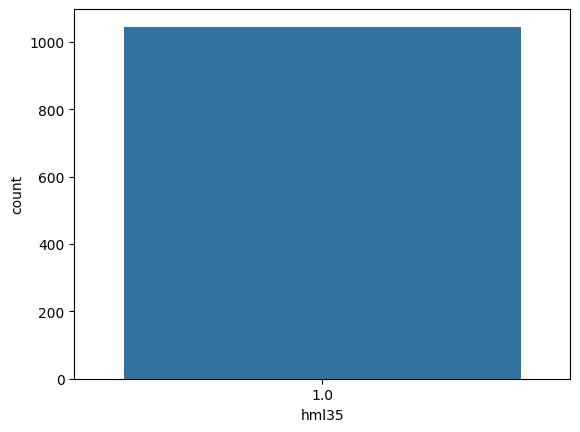

In [ ]:
sns.countplot(x = ddf["hml35"])
ddf['hml35'].value_counts()

<Axes: xlabel='hv025', ylabel='count'>

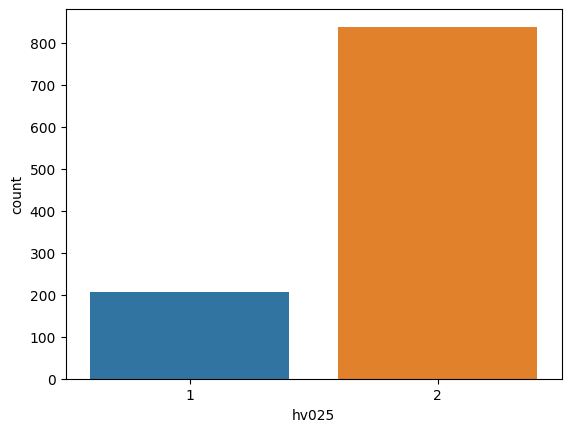

In [ ]:
sns.countplot(x = ddf.iloc[:,2])

In [ ]:
NewFeatures

,var,Var,Description,DataType,Values
0,hv009,HV009,Number of household members,int,0 to 90
1,hv024,HV024,SubRegion,category,"Sokoto, Zamfara, Katsina, Jigawa, Yobe, Borno,..."
2,hv025,HV025,Type of place of residence,category,Urban & Rural
3,hv045c,HV045C,Native language of respondent,category,"English, Hausa, Yoruba, Igbo, Fulfulde, Other"
4,hv201,HV201,Source of drinking water,category,"PIPED WATER, Piped into dwelling, Piped to yar..."
5,hv204,HV204,Time to get to water source (minutes),int,"0 to 900, 996 (On premises), 998 (Don't know)"
6,hv205,HV205,Type of toilet facility,category,"FLUSH TOILET, Flush to piped sewer system, Flu..."
7,hv225,HV225,Share toilet with other households,category,No & Yes
8,hv227,HV227,Has mosquito bed net for sleeping,category,No & Yes
9,hv228,HV228,Children under 5 slept under mosquito bed net,category,"No, All children, Some children, No net in hou..."


In [ ]:
ele = ['Has mosquito bed net for sleeping', "Presence of species: vivax (Pv)","Result of malaria rapid test" ]

In [ ]:
#ele = ['hv227','hml32d','hml35']

In [ ]:
del temp[ele[0]]
del temp[ele[1]]
del temp[ele[2]]

In [ ]:
temp.columns

Index(['Number of household members', 'SubRegion',
       'Type of place of residence', 'Native language of respondent',
       'Source of drinking water', 'Time to get to water source (minutes)',
       'Type of toilet facility', 'Share toilet with other households',
       'Children under 5 slept under mosquito bed net',
       'Location of source for water', 'Location of toilet facility',
       'Owns land usable for agriculture',
       'Owns livestock, herds or farm animals', 'Owns pigs',
       'Wealth index combined', 'Region', 'Child's age in days',
       'Sex of the Child', 'Hemoglobin level (g/dl - 1 decimal)',
       'Anemia level', 'Mother's highest educational level',
       'Net observed by interviewer', 'Insecticide-Treated Net (ITN)',
       'Obtained net from campaign, antenatal or immuni',
       'Final result of malaria from blood smear test',
       'Presence of species: falciparum (Pf)',
       'Presence of species: malariae (Pm)', 'Presence of species: ovale (Po)

In [ ]:
temp[temp['Time to get to water source (minutes)'] != 996]#hv204

Description,Number of household members,SubRegion,Type of place of residence,Native language of respondent,Source of drinking water,Time to get to water source (minutes),Type of toilet facility,Share toilet with other households,Children under 5 slept under mosquito bed net,Location of source for water,...,Presence of species: ovale (Po),Suffer from illness/symptom: extreme weakness,Suffer from illness/symptom: heart problems,Suffer from illness/symptom: abnormal bleeding,Suffer from illness/symptom: jaundice or yellow,Suffer from illness/symptom: dark urine,Suffer from illness/symptom: vomiting,Suffer from illness/symptom: pallor,Suffer from illness/symptom: refusal to eat,Suffer from illness/symptom: very cold hands an
3,6,18,1,6,21,6,12,0.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10,18,1,6,21,2,12,0.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,7,18,2,6,43,45,23,1.0,1.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,7,18,2,6,42,10,12,0.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,7,18,2,6,43,20,13,1.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,7,21,1,3,31,500,22,1.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1038,4,21,1,3,14,5,22,1.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1042,3,21,1,3,21,5,13,1.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1043,5,21,1,3,31,500,11,0.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#temp[temp['hv204'] != 996]

In [ ]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 37 columns):
 #   Column                                           Non-Null Count  Dtype   
---  ------                                           --------------  -----   
 0   Number of household members                      1045 non-null   int64   
 1   SubRegion                                        1045 non-null   category
 2   Type of place of residence                       1045 non-null   category
 3   Native language of respondent                    1045 non-null   category
 4   Source of drinking water                         1045 non-null   category
 5   Time to get to water source (minutes)            1045 non-null   int64   
 6   Type of toilet facility                          1045 non-null   category
 7   Share toilet with other households               1045 non-null   category
 8   Children under 5 slept under mosquito bed net    1045 non-null   category
 9   Location of source 

# Chi_Squared test and Kruskal test

In [ ]:
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
def Chi_Squared(x,y):
    contigency= pd.crosstab(x,y)
    c, p, dof, expected = chi2_contingency(contigency)
    v = c,p,dof
    return v

def Kruskal(x,y):   
    #f = encoder.fit_transform(x)
    v = stats.kruskal(x,y)
    return v

In [ ]:
def corrr(data):
    
    #data = ddf.copy()
    col = data.columns
    le = len(data.columns)
    cof = pd.DataFrame({
            "var": data.columns,
            "Chi": np.zeros(le),
            "p-value": np.zeros(le),
            "dof":np.zeros(le),
            'Dtype':np.zeros(le),
            "Decision":np.zeros(le)
        })

    
    varl = []
    
    for i in range(len(data.columns)):
        if data.iloc[:,i].dtype == "category":
            #data.iloc[:,i] = encoder.fit_transform(data.iloc[:,i])#.astype('category')
            cof.iloc[i,1],cof.iloc[i,2],cof.iloc[i,3] = Chi_Squared(data.iloc[:,i],data['Final result of malaria from blood smear test'])
            #'Final result of malaria from blood smear test' = 'hml32'
            cof.iloc[i,-2] = data.iloc[:,i].dtype
        else:
            v = Kruskal(data.iloc[:,i],data['Final result of malaria from blood smear test'])
            cof.iloc[i,1] = v[0]
            cof.iloc[i,2] = v[1]
            cof.iloc[i,3] = 1
            cof.iloc[i,-2] = data.iloc[:,i].dtype
        
    cof['Decision'] = cof["p-value"]<0.05
    for i in range(len(data.columns)):
        if cof.iloc[i,-1] != False:
            varl.append(cof.iloc[i,0])

    DATA = data[varl]
    
    
        
    return cof,DATA

In [ ]:
corr = corrr(temp)

In [ ]:
corr[0]

,var,Chi,p-value,dof,Dtype,Decision
0,Number of household members,1620.872780,0.000000e+00,1.0,int64,True
1,SubRegion,62.151036,3.153244e-03,35.0,category,True
2,Type of place of residence,10.339342,1.302244e-03,1.0,category,True
3,Native language of respondent,17.321305,1.673913e-03,4.0,category,True
4,Source of drinking water,21.469956,2.881652e-02,11.0,category,True
5,Time to get to water source (minutes),1591.066796,0.000000e+00,1.0,int64,True
6,Type of toilet facility,17.943525,5.592380e-02,10.0,category,False
7,Share toilet with other households,2.660290,1.028820e-01,1.0,category,False
8,Children under 5 slept under mosquito bed net,1.278780,5.276140e-01,2.0,category,False
9,Location of source for water,0.687799,7.090000e-01,2.0,category,False


In [ ]:
#for i in range(37):
#    print(i+1)

In [ ]:
newdf = corr[1].copy()
newdf

Description,Number of household members,SubRegion,Type of place of residence,Native language of respondent,Source of drinking water,Time to get to water source (minutes),"Owns livestock, herds or farm animals",Owns pigs,Wealth index combined,Region,Child's age in days,Hemoglobin level (g/dl - 1 decimal),Anemia level,Mother's highest educational level,Final result of malaria from blood smear test,Presence of species: falciparum (Pf),Presence of species: malariae (Pm),Presence of species: ovale (Po)
0,6,18,1,6,31,996,1,2,4,1,1521,119.0,4.0,1.0,0.0,0.0,0.0,0.0
1,6,18,1,6,31,996,0,0,4,1,1309,93.0,2.0,2.0,1.0,1.0,0.0,0.0
2,6,18,1,6,31,996,0,0,4,1,710,110.0,4.0,2.0,0.0,0.0,0.0,0.0
3,6,18,1,6,21,6,0,0,3,1,1772,100.0,3.0,2.0,0.0,0.0,0.0,0.0
4,10,18,1,6,21,2,0,0,5,1,629,90.0,2.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,9,21,1,3,21,996,0,0,4,6,1689,99.0,2.0,1.0,1.0,1.0,0.0,0.0
1041,9,21,1,3,21,996,0,0,4,6,851,70.0,2.0,1.0,1.0,1.0,0.0,0.0
1042,3,21,1,3,21,5,0,0,5,6,1207,103.0,3.0,2.0,1.0,1.0,0.0,0.0
1043,5,21,1,3,31,500,0,0,5,6,1445,85.0,2.0,1.0,1.0,1.0,0.0,0.0


In [ ]:
newdf.columns

Index(['Number of household members', 'SubRegion',
       'Type of place of residence', 'Native language of respondent',
       'Source of drinking water', 'Time to get to water source (minutes)',
       'Owns livestock, herds or farm animals', 'Owns pigs',
       'Wealth index combined', 'Region', 'Child's age in days',
       'Hemoglobin level (g/dl - 1 decimal)', 'Anemia level',
       'Mother's highest educational level',
       'Final result of malaria from blood smear test',
       'Presence of species: falciparum (Pf)',
       'Presence of species: malariae (Pm)',
       'Presence of species: ovale (Po)'],
      dtype='object', name='Description')

In [ ]:
var = corrr(newdf)[0].copy()
var

,var,Chi,p-value,dof,Dtype,Decision
0,Number of household members,1620.872780,0.000000e+00,1.0,int64,True
1,SubRegion,62.151036,3.153244e-03,35.0,category,True
2,Type of place of residence,10.339342,1.302244e-03,1.0,category,True
3,Native language of respondent,17.321305,1.673913e-03,4.0,category,True
4,Source of drinking water,21.469956,2.881652e-02,11.0,category,True
5,Time to get to water source (minutes),1591.066796,0.000000e+00,1.0,int64,True
6,"Owns livestock, herds or farm animals",5.555287,1.842495e-02,1.0,category,True
7,Owns pigs,445.052429,8.607102e-99,1.0,int64,True
8,Wealth index combined,10.275718,3.603073e-02,4.0,category,True
9,Region,18.924853,1.985076e-03,5.0,category,True


In [ ]:
newdf.shape

(1045, 18)

In [ ]:
newdf['Final result of malaria from blood smear test'].value_counts()

0.0    578
1.0    467
Name: Final result of malaria from blood smear test, dtype: int64

# Over Sampling

In [ ]:
# check version number
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
print(imblearn.__version__)

0.10.1


# RandomOverSampler

In [ ]:
n = 10000

In [ ]:
n*.55

5500.0

/usr/local/lib/python3.9/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (5500) in class 0 will be larger than the number of samples in the majority class (class #0.0 -> 578)
/usr/local/lib/python3.9/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (4500) in class 1 will be larger than the number of samples in the majority class (class #0.0 -> 578)


0.0    5500
1.0    4500
Name: Final result of malaria from blood smear test, dtype: int64


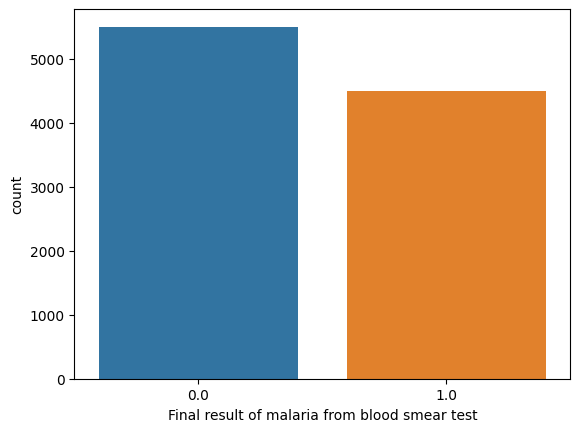

In [ ]:
oversample = RandomOverSampler(sampling_strategy={0:int(n*0.55),1:int(n*0.45)},random_state=123)
Xx = (newdf.drop(columns=['Final result of malaria from blood smear test'])).copy()
Yy = newdf['Final result of malaria from blood smear test'].copy()
X_over, y_over = oversample.fit_resample(Xx, Yy)
sns.countplot(x=y_over)
print(y_over.value_counts())

In [ ]:
DataFrameROS = pd.DataFrame(X_over)
DataFrameROS['Final result of malaria from blood smear test'] = y_over
DataFrameROS.head()

Description,Number of household members,SubRegion,Type of place of residence,Native language of respondent,Source of drinking water,Time to get to water source (minutes),"Owns livestock, herds or farm animals",Owns pigs,Wealth index combined,Region,Child's age in days,Hemoglobin level (g/dl - 1 decimal),Anemia level,Mother's highest educational level,Presence of species: falciparum (Pf),Presence of species: malariae (Pm),Presence of species: ovale (Po),Final result of malaria from blood smear test
0,6,18,1,6,31,996,1,2,4,1,1521,119.0,4.0,1.0,0.0,0.0,0.0,0.0
1,6,18,1,6,31,996,0,0,4,1,1309,93.0,2.0,2.0,1.0,0.0,0.0,1.0
2,6,18,1,6,31,996,0,0,4,1,710,110.0,4.0,2.0,0.0,0.0,0.0,0.0
3,6,18,1,6,21,6,0,0,3,1,1772,100.0,3.0,2.0,0.0,0.0,0.0,0.0
4,10,18,1,6,21,2,0,0,5,1,629,90.0,2.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
DataFrameROS.shape

(10000, 18)

In [ ]:
#Logistic Regression (LR)
#Decision Tree (DT)/ Random Forest
#Automated Machine Learning (AutoML) framework H2O

In [ ]:
import pandas as pd
from sklearn import svm
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier

from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics


In [ ]:
DataFrameROSX = DataFrameROS.drop(columns=["Final result of malaria from blood smear test"]).copy()
DataFrameROSY = DataFrameROS["Final result of malaria from blood smear test"].copy()

encoder = LabelEncoder()
DataFrameROSY = encoder.fit_transform(DataFrameROSY)

X_train, X_test, y_train, y_test = train_test_split(DataFrameROSX, DataFrameROSY, test_size=0.2, random_state=123)
X_test, X_val, y_test, y_val     = train_test_split(X_test, y_test, test_size=0.5, random_state=123)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.fit_transform(X_test)
X_val   = sc.fit_transform(X_val)

In [ ]:

met

,mae,rmsee,r2,pre,re,f1
Train,0.0,0.0,0.0,0.0,0.0,0.0
Test,0.0,0.0,0.0,0.0,0.0,0.0
Val,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def ML(model,X_train, X_test,X_val, y_train, y_test, y_val):

  met = pd.DataFrame({
    "mae": np.zeros(3),
    "rmsee":np.zeros(3),
    "r2":np.zeros(3),
    "precision":np.zeros(3),
    "recall":np.zeros(3),
    "f1score":np.zeros(3),
    "accuracy":np.zeros(3),
    }).T
  met.columns = ["Train","Test","Val"] ; met = met.T
 
  for i in range(2):
    if i == 0:
      y_pred = model.predict(X_train)
      y      = y_train
      X = X_train
    else:
      y_pred = model.predict(X_test)
      y      = y_test
      X = X_test

    met.iloc[i,0] = mean_absolute_error(y, y_pred)
    met.iloc[i,1] = mean_squared_error(y, y_pred, squared=False)
    met.iloc[i,2] = r2_score(y, y_pred)
    met.iloc[i,3] = metrics.precision_score(y, y_pred)
    met.iloc[i,4] = metrics.recall_score(y, y_pred)
    met.iloc[i,5] = metrics.f1_score(y, y_pred)
    met.iloc[i,6] = model.score(X, y)

  
  met.iloc[2,0] = abs(cross_val_score(model, X_val, y_val, cv=10, scoring='neg_mean_absolute_error').mean())
  met.iloc[2,1] = abs(cross_val_score(model, X_val, y_val, cv=10, scoring='neg_root_mean_squared_error').mean())
  met.iloc[2,2] = cross_val_score(model, X_val, y_val, cv=10, scoring='r2').mean()
  met.iloc[2,3] = cross_val_score(model, X_val, y_val, cv=10, scoring='precision').mean()
  met.iloc[2,4] = cross_val_score(model, X_val, y_val, cv=10, scoring='recall').mean()
  met.iloc[2,5] = cross_val_score(model, X_val, y_val, cv=10, scoring='f1').mean()
  met.iloc[2,6] = cross_val_score(model, X_val, y_val, cv=10, scoring='accuracy').mean()

  return met
  

In [ ]:
LR = LogisticRegression(penalty="l2",
                        max_iter=1000,solver="newton-cholesky",
                        random_state=123).fit(X_train, y_train)
ML(LR,X_train, X_test,X_val, y_train, y_test, y_val)

,mae,rmsee,r2,precision,recall,f1score,accuracy
Train,0.001625,0.040311,0.993435,0.996404,1.0,0.998199,0.998375
Test,0.002000,0.044721,0.991954,0.995690,1.0,0.997840,0.998000
Val,0.003000,0.030000,0.987803,0.993283,1.0,0.996603,0.997000


In [ ]:
DT = DecisionTreeClassifier(random_state=123,
                            max_depth=4,max_features='sqrt',
                            splitter = "random",
                            ccp_alpha = 0.01,
                            ).fit(X_train, y_train)
ML(DT,X_train, X_test,X_val, y_train, y_test, y_val)

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


,mae,rmsee,r2,precision,recall,f1score,accuracy
Train,0.1325,0.364005,0.464700,1.000000,0.705719,0.827474,0.8675
Test,0.1430,0.378153,0.424677,1.000000,0.690476,0.816901,0.8570
Val,0.1190,0.315056,0.515560,0.897222,0.728171,0.800796,0.8810


In [ ]:
import h2o
h2o.init()
from h2o.model.segment_models import H2OFrame
from h2o.estimators import H2ORandomForestEstimator
from h2o.automl import H2OAutoML

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,13 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.3
H2O_cluster_version_age:,22 hours and 26 minutes
H2O_cluster_name:,H2O_from_python_unknownUser_si2xsl
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
h2odf2 = DataFrameROS.copy()
df2h2o = H2OFrame(h2odf2)
df2h2o["Final result of malaria from blood smear test"] = df2h2o["Final result of malaria from blood smear test"].asfactor()
train, test, valid = df2h2o.split_frame(ratios=[.8, .1],seed=123)
y = "Final result of malaria from blood smear test"
x = df2h2o.columns
x.remove(y)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Run AutoML for  base models
aaml = H2OAutoML(max_models=5, seed=123, nfolds = 10,sort_metric= 'AUC')
aaml.train(x=x, y=y, training_frame=train, validation_frame=valid)

AutoML progress: |
15:38:49.957: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),2/4
# GBM base models (used / total),1/1
# XGBoost base models (used / total),0/1
# GLM base models (used / total),0/1
# DRF base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,10
Metalearner fold_column,None


In [ ]:
lb = aaml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_1_AutoML_4_20230405_153849,1,7.40051e-05,1,0,0.000109129,1.19091e-08
GBM_1_AutoML_4_20230405_153849,1,2.46439e-18,1,0,8.87991e-17,7.88529e-33
StackedEnsemble_AllModels_1_AutoML_4_20230405_153849,1,7.40606e-05,1,0,0.000109367,1.19611e-08
GLM_1_AutoML_4_20230405_153849,1,0.00270935,1,0,0.0242732,0.00058919
DRF_1_AutoML_4_20230405_153849,1,0.000510014,1,0,0.00380292,1.44622e-05
XGBoost_2_AutoML_4_20230405_153849,0.999999,0.00438004,0.999999,0.000227324,0.0275389,0.000758394
XGBoost_1_AutoML_4_20230405_153849,0.999968,0.0130182,0.999961,0.00301277,0.0562189,0.00316057


In [ ]:
bbest_model = aaml.get_best_model()
print(bbest_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_4_20230405_153849


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  2/4
# GBM base models (used / total)      1/1
# XGBoost base models (used / total)  0/1
# GLM base models (used / total)      0/1
# DRF base models (used / total)      1/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    10
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 6.5520255132689105e-09
RMSE: 8.094458297668172e-05
LogLoss: 6.168416904054986e-05
AUC: 1.0
AUCPR: 1.0
Gini: 1.0
Null degrees of freedom: 8018
Residual degrees of freedom: 8016
Null deviance: 11040

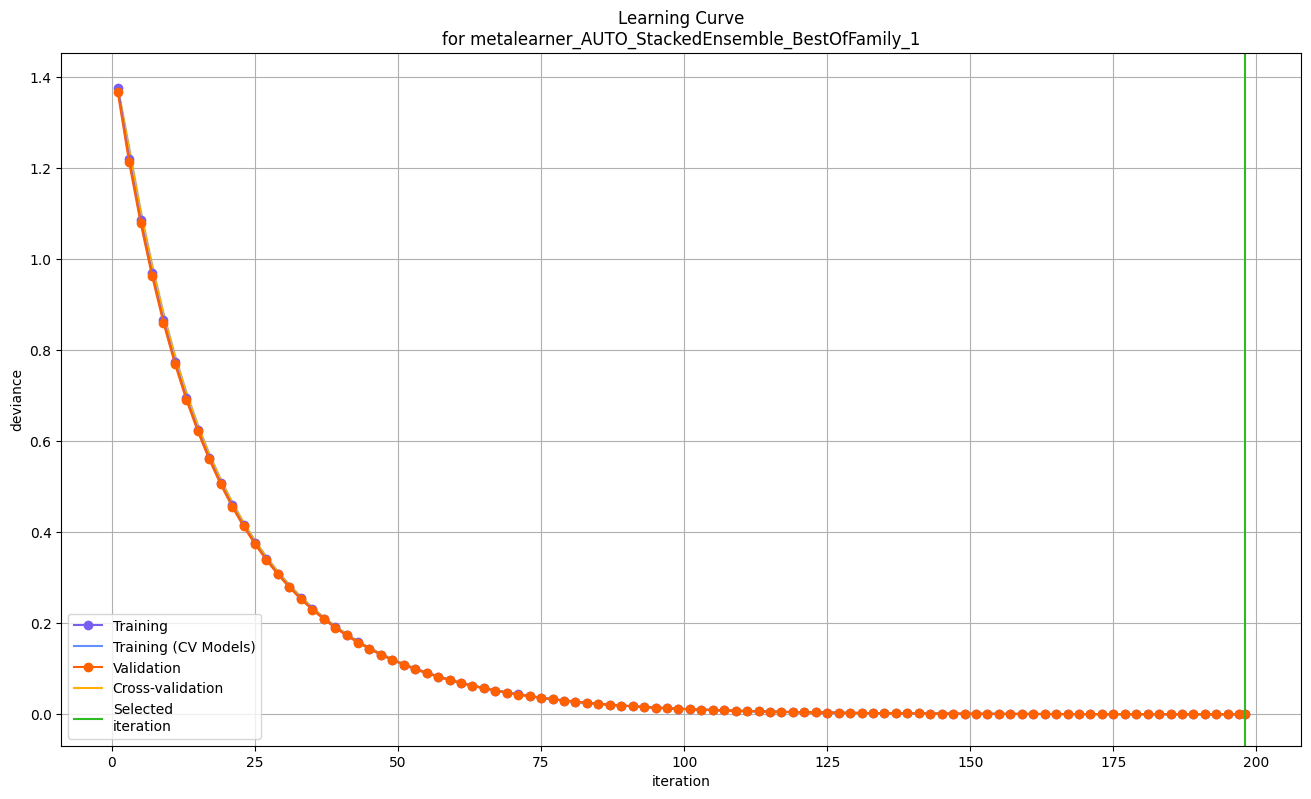

In [ ]:
bbest_model.learning_curve_plot() 

In [ ]:
#bbest_model.varimp_plot()

In [ ]:
print("train accuracy                 : ",best_model.accuracy(train=True, valid=False, xval=False)[0][1])
print("validation accuracy            : ",best_model.accuracy(train=False, valid=True, xval=False)[0][1])
print("after validation train accuracy: ",best_model.model_performance(train).accuracy()[0][1])
print("test accuracy                  : ",best_model.model_performance(test).accuracy()[0][1])
H2OTr = best_model.model_performance(train).accuracy()[0][1]
H2OTe = best_model.model_performance(test).accuracy()[0][1]

train accuracy                 :  1.0
validation accuracy            :  1.0
after validation train accuracy:  1.0
test accuracy                  :  1.0


In [ ]:
best_model.mse(train=False, valid=False, xval=True)#[0][1]

1.1961051483974208e-08

**Original** **Data**

In [ ]:
DataFrameROSX = newdf.drop(columns=["Final result of malaria from blood smear test"]).copy()
DataFrameROSY = newdf["Final result of malaria from blood smear test"].copy()

encoder = LabelEncoder()
DataFrameROSY = encoder.fit_transform(DataFrameROSY)

X_train, X_test, y_train, y_test = train_test_split(DataFrameROSX, DataFrameROSY, test_size=0.2, random_state=123)
X_test, X_val, y_test, y_val     = train_test_split(X_test, y_test, test_size=0.5, random_state=123)

In [ ]:
LR = LogisticRegression(penalty="l2",
                        max_iter=1000,solver="newton-cholesky",
                        random_state=123).fit(X_train, y_train)
ML(LR,X_train, X_test,X_val, y_train, y_test, y_val)

,mae,rmsee,r2,precision,recall,f1score,accuracy
Train,0.007177,0.084717,0.971112,0.994778,0.98961,0.992188,0.992823
Test,0.000000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000
Val,0.000000,0.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
DT = DecisionTreeClassifier(random_state=123,
                            max_depth=4,max_features='sqrt',
                            splitter = "random",
                            ccp_alpha = 0.01,
                            ).fit(X_train, y_train)
ML(DT,X_train, X_test,X_val, y_train, y_test, y_val)

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


,mae,rmsee,r2,precision,recall,f1score,accuracy
Train,0.138756,0.372500,0.441495,1.00,0.698701,0.822630,0.861244
Test,0.153846,0.392232,0.365612,1.00,0.627907,0.771429,0.846154
Val,0.270000,0.490118,-0.158333,0.75,0.300000,0.400000,0.730000


In [ ]:
h2odf2 = newdf.copy()
df2h2o = H2OFrame(h2odf2)
df2h2o["Final result of malaria from blood smear test"] = df2h2o["Final result of malaria from blood smear test"].asfactor()
train, test, valid = df2h2o.split_frame(ratios=[.8, .1],seed=123)
y = "Final result of malaria from blood smear test"
x = df2h2o.columns
x.remove(y)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Run AutoML for  base models
aml = H2OAutoML(max_models=5, seed=123, nfolds = 10,sort_metric= 'AUC')
aml.train(x=x, y=y, training_frame=train, validation_frame=valid)

AutoML progress: |
14:48:24.297: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_2_20230405_144824


GLM Model: summary
    family    link    regularization               lambda_search                                                                   number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ---------------------------  ------------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ------------------------------------------------
    binomial  logit   Ridge ( lambda = 5.341E-4 )  nlambda = 30, lambda.max = 49.331, lambda.min = 5.341E-4, lambda.1se = 0.00223  17                            17                             62                      AutoML_2_20230405_144824_training_py_21_sid_bf47

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.000967764772986184
RMSE: 0.0311089179012415
LogLoss: 0.006685315145587008
AUC: 0.9999941150853902
AUCPR: 0.9999931201221001
Gini: 0.9999882301707803
Null degrees of freedom: 826
Residual degrees of freedom: 809
Null deviance: 1141.3513365207393
Residual deviance: 11.057511250800902
AIC: 47.0575112508009

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8559442851213893
       0    1    Error    Rate
-----  ---  ---  -------  -----------
0      445  1    0.0022   (1.0/446.0)
1      0    381  0        (0.0/381.0)
Total  445  382  0.0012   (1.0/827.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.855944     0.998689  204
max f2                       0.855944     0.999475  204
max f0point5                 0.924021     0.999474  202
max accuracy                 0.924021     0.998791  202
max precision                0.999999     1         0
max recall                   0.855944     1         204
max specificity              0.999999     1         0
max absolute_mcc             0.855944     0.99757   204
max min_per_class_accuracy   0.855944     0.997758  204
max mean_per_class_accuracy  0.855944     0.998879  204
max tns                      0.999999     446       0
max fns                      0.999999     365       0
max fps                      0.00011687   446       399
max tps                      0.855944     381       204
max tnr                      0.999999     1         0
max fnr                      0.999999     0.958005  0
max fpr                      0.00011687   1         399
max tpr                      0.855944     1         204

Gains/Lift Table: Avg response rate: 46.07 %, avg score: 46.07 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.0108827                   0.999999           2.1706   2.1706             1                0.999999     1                           0.999999            0.023622        0.023622                   117.06   117.06             0.023622
2        0.0205562                   0.999608           2.1706   2.1706             1                0.999963     1                           0.999983            0.0209974       0.0446194                  117.06   117.06             0.0446194
3        0.0302297                   0.998874           2.1706   2.1706             1                0.999173     1                           0.999723            0.0209974       0.0656168                  117.06   117.06       

In [ ]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_2_20230405_144824


GLM Model: summary
    family    link    regularization               lambda_search                                                                   number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ---------------------------  ------------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ------------------------------------------------
    binomial  logit   Ridge ( lambda = 5.341E-4 )  nlambda = 30, lambda.max = 49.331, lambda.min = 5.341E-4, lambda.1se = 0.00223  17                            17                             62                      AutoML_2_20230405_144824_training_py_21_sid_bf47

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.000967764772986184
RMSE: 0.0311089

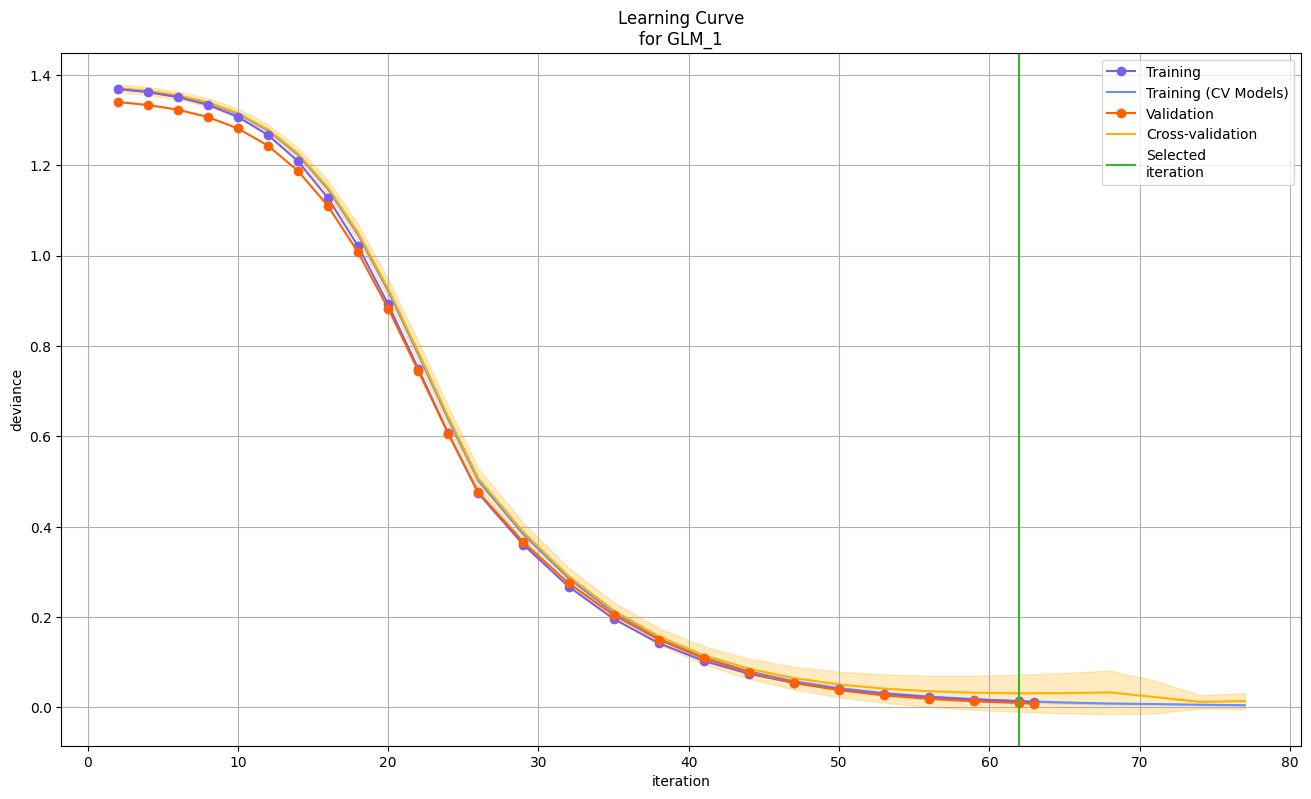

In [ ]:
best_model.learning_curve_plot() 

In [ ]:
best_model.precision(train=True, valid=False, xval=False)[0][1]

1.0

In [ ]:
best_model.varimp_plot()

H2OValueError: ignored

In [ ]:
s = H2OFrame(g)
s['hml32'] =s['hml32'].asfactor()
train, test, valid = s.split_frame(ratios=[.8, .1],seed=123)
y = 'hml32'
x = s.columns
x.remove(y)
model = H2ORandomForestEstimator(ntrees=130,
                                    max_depth=2,
                                    min_rows=13,
                                    calibrate_model=True,
                                    calibration_frame=valid,
                                    binomial_double_trees=True,
                                    distribution = 'auto',seed = 123)
model.train(x=x, y=y, training_frame=train, validation_frame=valid)
perf = model.model_performance()
print("train accuracy                 : ",model.accuracy(train=True, valid=False, xval=False)[0][1])
print("validation accuracy            : ",model.accuracy(train=False, valid=True, xval=False)[0][1])
print("after validation train accuracy: ",model.model_performance(train).accuracy()[0][1])
print("test accuracy                  : ",model.model_performance(test).accuracy()[0][1])
model.learning_curve_plot()
model.varimp_plot()
model.plot(metric="auc")

In [ ]:
#dfh2['target'] = dfh2['target'].asfactor()
f = H2OFrame(me)
f['hml32'] =f['hml32'].asfactor()
train, test, valid = f.split_frame(ratios=[.8, .1],seed=123)
y = 'hml32'
x = f.columns
x.remove(y)

model = H2ORandomForestEstimator(ntrees=130,
                                    max_depth=2,
                                    min_rows=13,
                                    calibrate_model=True,
                                    calibration_frame=valid,
                                    binomial_double_trees=True,
                                    distribution = 'auto',seed = 123)
model.train(x=x, y=y, training_frame=train, validation_frame=valid)
perf = model.model_performance()
print("train accuracy                 : ",model.accuracy(train=True, valid=False, xval=False)[0][1])
print("validation accuracy            : ",model.accuracy(train=False, valid=True, xval=False)[0][1])
print("after validation train accuracy: ",model.model_performance(train).accuracy()[0][1])
print("test accuracy                  : ",model.model_performance(test).accuracy()[0][1])
model.learning_curve_plot()
model.varimp_plot()
model.plot(metric="auc")

In [ ]:
model.plot(metric="auc")

In [ ]:
LR = LogisticRegression(penalty="l2",
                        max_iter=10000,solver="newton-cholesky",
                        random_state=123).fit(X_train, y_train)

LTr = LR.score(X_train, y_train)
LTe = LR.score(X_test, y_test)
y_pred = LR.predict(X_train)
LMA = mean_absolute_error(y_train, y_pred)
LRM = mean_squared_error(y_train, y_pred, squared=False)
LR2 = r2_score(y_train, y_pred)

print("train MAE",LMA)
print("train RMSE",LRM)
print("train R2",LR2)
print("train accuracy: ",LTr)
print("test accuracy: ",LTe)
print('Precision',metrics.precision_score(y_train, y_pred))
print('Recall',metrics.recall_score(y_train, y_pred))
print('f1Score',metrics.f1_score(y_train, y_pred))


train accuracy:  1.0
test accuracy:  1.0


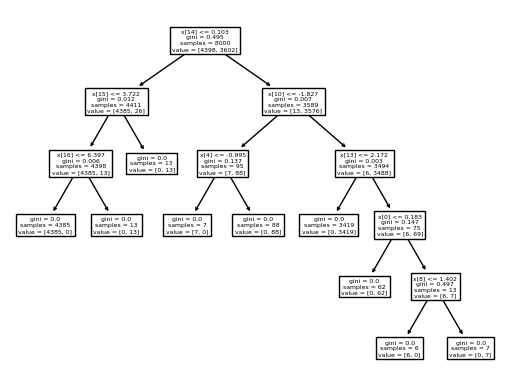

In [ ]:
DT = DecisionTreeClassifier(random_state=123).fit(X_train, y_train)
DTr = DT.score(X_train, y_train)
DTe = DT.score(X_test, y_test)
print("train accuracy: ",DTr)
print("test accuracy: ",DTe)
path = DT.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas = (ccp_alphas.round(5))*100
impurities = (impurities.round(5))*100
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1],impurities[:-1],marker = 'o',drawstyle = "steps-post")
ax.set_xlabel("alpha")
ax.set_ylabel("impurity")
tree.plot_tree(DT)
plt.show()

train accuracy:  0.8675
test accuracy:  0.857


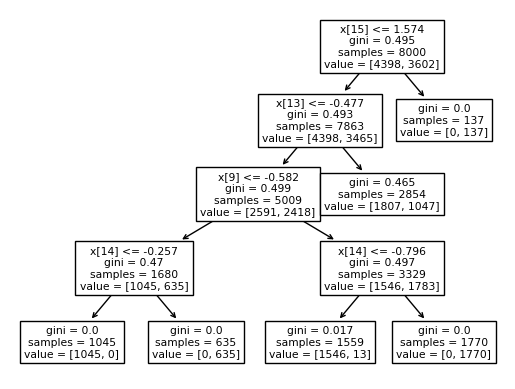

In [ ]:
DT = DecisionTreeClassifier(random_state=123,
                            max_depth=4,max_features='sqrt',
                            splitter = "random",
                            ccp_alpha = 0.05,
                            ).fit(X_train, y_train)
DTr = DT.score(X_train, y_train)
DTe = DT.score(X_test, y_test)
print("train accuracy: ",DTr)
print("test accuracy: ",DTe)
tree.plot_tree(DT)
plt.show()